# Worksheet 12

Name:  Quan Ho

UID: U17207751

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1:classification
2:not cliassifciaiton
3:classification
4:not cliassifciaiton

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

You can divide the dataset as test sets and training sets. The training set will be used to evaluate and trained and later compared to the test set.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting: When the model does a poor job on traiing and test data because it oversimplifies the problem. Signs include high training and high or low test errors

Overfitting: THe model fits too "closely" to the trianing dataset, which hinders its abilities to predict uknown data. Signs include: low training error, and high test error.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

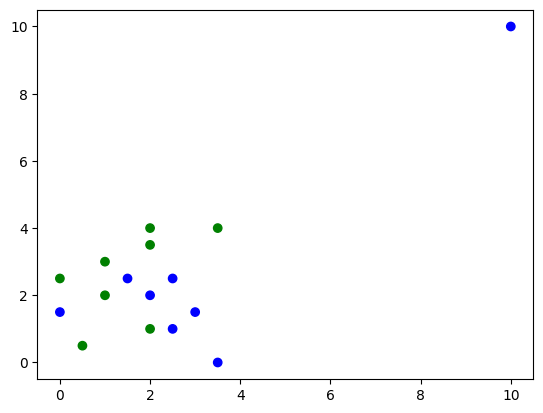

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'],data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, the blue point at (10,10)

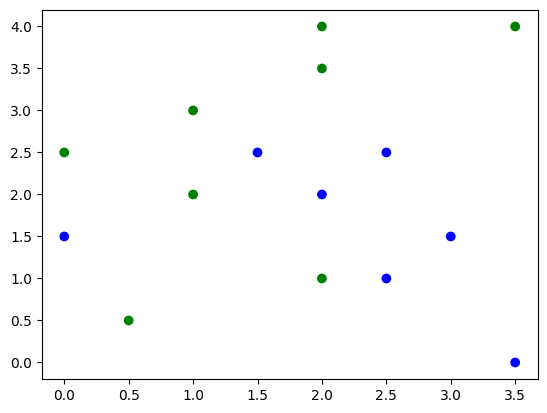

In [3]:
for key in ['Attribute A', 'Attribute B', 'Class']:
    data[key] = data[key][:-1]
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'],data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes, the points (0,1.5) and (2.0,1.0) could be noise points



For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

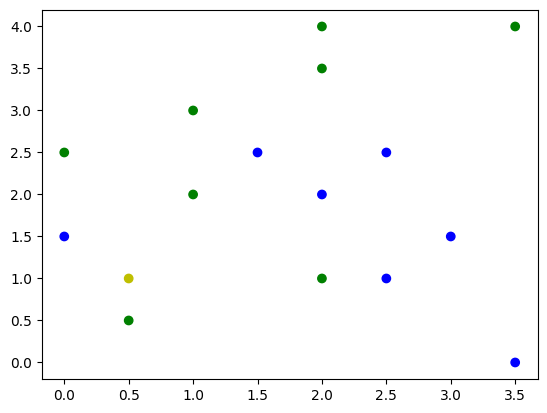

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

#Remove outliers
for key in ['Attribute A', 'Attribute B', 'Class']:
    data[key] = data[key][:-1]

#Add (0.5, 1)
data['Attribute A'].append(0.5)
data['Attribute B'].append(1)
data['Class'].append(1)

# Find the index where Attribute A is 0.5 and Attribute B is 1
index = None
for i in range(len(data['Attribute A'])):
    if data['Attribute A'][i] == 0.5 and data['Attribute B'][i] == 1:
        index = i
        break

# If the point is found, set its class to 2
if index is not None:
    data['Class'][index] = 2


colors = np.array(['b', 'g', 'y', 'c', 'm', 'y', 'k']) #class 2 will be yellow, which is point (0.5, 1)
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data['Class']])
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[[0.5 0.5]
 [0.  1.5]
 [1.  2. ]]


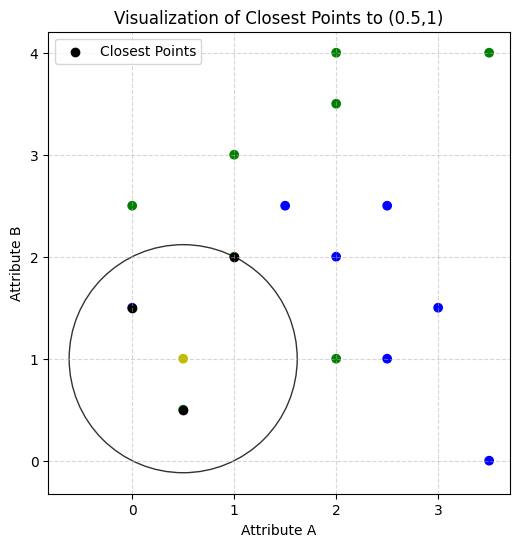

In [5]:
def n_closest_to(example, n, data):
    points = np.column_stack((data['Attribute A'], data['Attribute B']))
    distances = np.linalg.norm(points - example, axis=1)
    sorted_indices = np.argsort(distances)
    sorted_points = points[sorted_indices[1:n+1]]  # Exclude the example itself
    sorted_distances = distances[sorted_indices[1:n+1]]
    return sorted_points, sorted_distances


threepoints, dist = n_closest_to([0.5, 1], 3, data)
print(threepoints)
location = (0.5, 1)
radius = dist[2]
colors = np.array(['b', 'g', 'y', 'c', 'm', 'y', 'k'])

plt.figure(figsize=(8, 6))
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]])
plt.scatter(*zip(*threepoints), color='black', label='Closest Points')

plt.gca().add_patch(plt.Circle(location, radius, fill=False, alpha=0.8, color='black'))
plt.gca().set_aspect('equal')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Visualization of Closest Points to (0.5,1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority(points):
    class_counts = {0: 0, 1: 0}  # Initializing counts for each class
    for point in points:
        for i in range(len(data['Attribute A'])):
            if point[0] == data['Attribute A'][i] and point[1] == data['Attribute B'][i]:
                class_counts[data['Class'][i]] += 1

    # Determine the majority class
    majority_class = max(class_counts, key=class_counts.get)
    return majority_class

#Test
assigned_class = majority(threepoints)
print("Assigned class:", assigned_class)


Assigned class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
total_points = len(data["Attribute A"])

for i in range(total_points):
    test_point = [data["Attribute A"][i], data["Attribute B"][i]]
    actual_class = data["Class"][i]

    # Create training set
    training_data = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
        "Class": data["Class"][:i] + data["Class"][i+1:]
    }

    # Classify the test points
    threepoints, _ = n_closest_to(test_point, 3, training_data)
    prediction = majority(threepoints)

    # Check if matches
    if prediction == actual_class:
        count += 1

#accuracy
overall_accuracy = count / total_points
print("Overall accuracy =", overall_accuracy)


Overall accuracy = 0.5625


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [8]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
from sklearn.model_selection import train_test_split

# Create a smaller sample size due to computational limitations
sample_size = 9000

# Split the dataset into a smaller sample for faster processing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, random_state=1)

# Split the sample data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7200, 784) (7200,)
Testing set shape: (1800, 784) (1800,)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

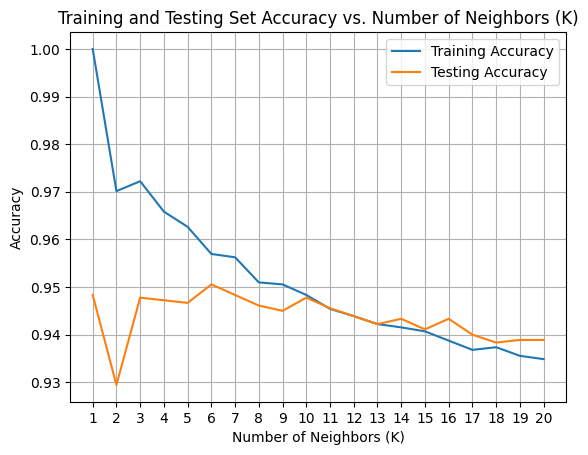

Optimal K value: 6


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []
n_samples = len(X_train[1])
for k in range(1, min(21, n_samples)):
    # Create KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    # Compute training accuracy

    # Prediction training set
    train_pred = knn.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, train_pred))

    # Prediction testing set
    test_pred = knn.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, test_pred))
# Plot
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Set Accuracy vs. Number of Neighbors (K)')
plt.legend()
plt.xticks(range(1, len(train_accuracy) + 1))
plt.grid(True)
plt.show()
optimal_k = np.argmax(test_accuracy) + 1  # +1 for k value
print("Optimal K value:", optimal_k)

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model with the optimal number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

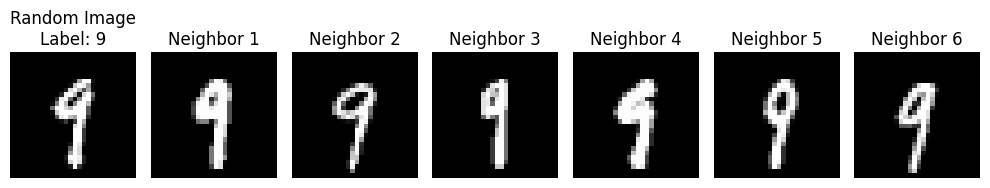

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Choose a random index from the testing set
random_index = np.random.randint(0, len(X_test))

# Select the random image and its corresponding label
random_image = X_test[random_index]
random_label = y_test[random_index]

# Use the trained KNN model to find the K nearest neighbors of the random image
distances, indices = knn_model.kneighbors([random_image], n_neighbors=optimal_k)
nearest_neighbors = X_train[indices[0]]

# Plot the random image along with its K nearest neighbors
plt.figure(figsize=(10, 4))
plt.subplot(1, optimal_k + 1, 1)
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f'Random Image\nLabel: {random_label}')
plt.axis('off')

for i in range(optimal_k):
    neighbor_image = nearest_neighbors[i]
    plt.subplot(1, optimal_k + 1, i + 2)
    plt.imshow(neighbor_image.reshape(28, 28), cmap='gray')
    plt.title(f'Neighbor {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=784)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a KNN model using the reduced-dimensional dataset
knn_model_pca = KNeighborsClassifier(n_neighbors= 20)  # Value of k
knn_model_pca.fit(X_train_pca, y_train)

# Evaluate
train_accuracy_pca = knn_model_pca.score(X_train_pca, y_train)
test_accuracy_pca = knn_model_pca.score(X_test_pca, y_test)

print("Training accuracy with PCA:", train_accuracy_pca)
print("Testing accuracy with PCA:", test_accuracy_pca)

Training accuracy with PCA: 0.9348611111111111
Testing accuracy with PCA: 0.9388888888888889


I chose 2 dimensions for PCA sbecause the data will be visualized more efficiently. However, there is a trade off in that the model's accuracy may vary due to information loss, oversimplification, and noise redcution.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

I added a couple new features, family size, fare per person, and title as it will reveal more of the individual's socio economic status. I noticed that the accuracy value plateaus as k reaches 20, so there is no point in creasing the k vlaue any higher. Currently, I have my accuracy at 80%. which is not a bad start to this competition.

Profile name: qho1234

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-784/mnist_784.csv


In [18]:
#New Features: title, Fare per person, family size

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the Titanic dataset
train_data = pd.read_csv("/content/train.csv") #Upload train.csv everytime into main  terminal on colab everytime

# Add a new column 'FamilySize' representing the total number of family members including the passenger
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Add a new column 'FarePerPerson' representing the fare paid by each individual passenger
train_data['FarePerPerson'] = train_data['Fare'] / train_data['FamilySize']

# Extract titles from the 'Name' column
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map titles to categories
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Lady": "Royalty",
    "Sir": "Royalty",
    "Mme": "Mrs",
    "Countess": "Royalty",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Capt": "Officer"
}
train_data['Title'] = train_data['Title'].map(title_mapping)

# Select relevant features and target
X = train_data[['Sex', 'Age', 'Pclass', 'Parch', 'FamilySize', 'FarePerPerson', 'Title']]
y = train_data['Survived']

# Convert categorical variables into numerical format
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X = pd.get_dummies(X, columns=['Title'])  # One-hot encode 'Title'

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['FarePerPerson'].fillna(X['FarePerPerson'].median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model_20 = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_scaled, y_train)

# Predict labels for the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8044692737430168


<ipython-input-18-f8678c00c84a>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
